# Data Preparation Basics

In [ ]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

saveFilePath = '/content/drive/My Drive/DataScience_Python_LinkedIn/MyCreatedFiles/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Filtering and selecting

In [ ]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [ ]:
series_obj = Series(np.arange(8), index=['row 1', 'row 3', 'row 3', 'row 4', 'row 5', 'row 6', 'row 7', 'row 8'])
series_obj

row 1    0
row 3    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int64

In [ ]:
series_obj['row 7']

6

In [ ]:
series_obj[[0, 7]]

row 1    0
row 8    7
dtype: int64

In [ ]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)),
                   index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'],
                   columns=['column 1', 'column 2', 'column 3', 'column 4', 'column 5', 'column 6'])
DF_obj

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
DF_obj.loc[['row 2', 'row 5'], ['column 5', 'column 2']]

,column 5,column 2
row 2,0.402366,0.437611
row 5,0.421004,0.559053


In [ ]:
series_obj['row 3' : 'row 7']

row 3    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int64

In [ ]:
DF_obj < .2

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


In [ ]:
series_obj[series_obj > 6]

row 8    7
dtype: int64

In [ ]:
series_obj[['row 1', 'row 5', 'row 8']] = 8
series_obj

row 1    8
row 3    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int64

## Treating Missing Values

In [ ]:
missing = np.nan

series_obj = Series(['row 1', 'row 3', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
series_obj

0    row 1
1    row 3
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [ ]:
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [ ]:
np.random.seed(25)

DF_obj = DataFrame(np.random.rand(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
4,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
5,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
filled_DF = DF_obj.fillna(0) # fill missing values with 0
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25}) # fill missing value based on dict with columns as key
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
fill_DF = DF_obj.fillna(method='ffill') # fill forward, fill missing values with last non-missing value
fill_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.117376
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.117376
3,0.447031,0.836375,0.481343,0.516502,0.383048,0.117376
4,0.447031,0.559053,0.034450,0.719930,0.421004,0.117376
5,0.447031,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
# count missing values
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

In [ ]:
# filter missing values
DF_no_NaN = DF_obj.dropna()
DF_no_NaN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [ ]:
DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


## Removing duplicates

In [ ]:
DF_obj = DataFrame({'column 1':[1,1,2,2,3,3,3],
                    'column 2':['a', 'a', 'b', 'b', 'c', 'c', 'c'],
                    'column 3':['A', 'A', 'B', 'B', 'C', 'C', 'C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [ ]:
DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [ ]:
DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [ ]:
DF_obj = DataFrame({'column 1':[1,1,2,2,3,3,3],
                    'column 2':['a', 'a', 'b', 'b', 'c', 'c', 'c'],
                    'column 3':['A', 'A', 'B', 'B', 'C', 'D', 'C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [ ]:
DF_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


## Concatenating and Transforming

In [ ]:
DF_obj = pd.DataFrame(np.arange(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [ ]:
DF_obj_2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [ ]:
# Concatenating data
pd.concat([DF_obj, DF_obj_2], axis = 1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [ ]:
pd.concat([DF_obj, DF_obj_2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


In [ ]:
# Transform Data
DF_obj.drop([0,2])  # drop rows 0 amd 2

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [ ]:
DF_obj.drop([0, 2], axis=1) # drop columns

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


In [ ]:
# Add Data
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int64

In [ ]:
variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [ ]:
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

<ipython-input-11-9bea37e0ee2a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  added_datatable = variable_added.append(variable_added, ignore_index=False)


,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [ ]:
added_datatable = variable_added.append(variable_added, ignore_index=True)
added_datatable

<ipython-input-12-b2d1bccdcfb9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  added_datatable = variable_added.append(variable_added, ignore_index=True)


,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


In [ ]:
# Sort data
DF_sorted = DF_obj.sort_values(by=(5), ascending=False) # sort by 5th column in decreasing order
DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


## Grouping and Aggregation

In [ ]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
address = '/content/drive/My Drive/DataScience_Python_LinkedIn/Data/mtcars.csv'

cars = pd.read_csv(address)

cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

<ipython-input-3-6744f6376c11>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


## Quiz

In [ ]:
cars.groupby(cars['am']).mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,
0,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
1,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077


In [ ]:
cars_subset=cars[['mpg', 'disp', 'hp', 'wt']]
cars_subset

In [ ]:
df_1 = np.array([[1.,3.,4.],[2.,5.,2.],[0.,4.,1.]])
df_2 =np. array([[2.,1.],[0.,5.],[4.,7.]])
[df_1, df_2]

[array([[1., 3., 4.],
        [2., 5., 2.],
        [0., 4., 1.]]), array([[2., 1.],
        [0., 5.],
        [4., 7.]])]

# Practical Data Visualization

## Creating Standard Data Graphics

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy.random import randn

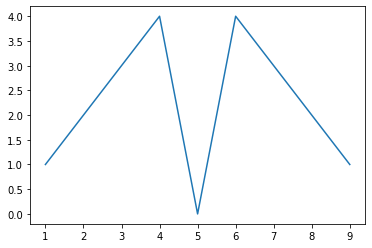

In [ ]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

In [ ]:
mpg = cars['mpg']

<Axes: >

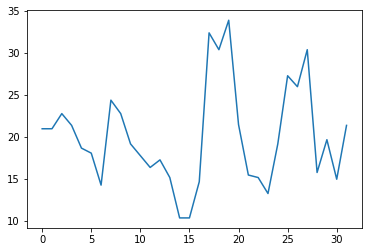

In [ ]:
mpg.plot()

<Axes: >

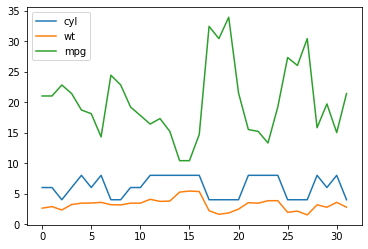

In [ ]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

<BarContainer object of 9 artists>

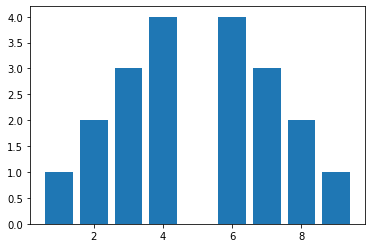

In [ ]:
# Bar charts
plt.bar(x,y)

<Axes: >

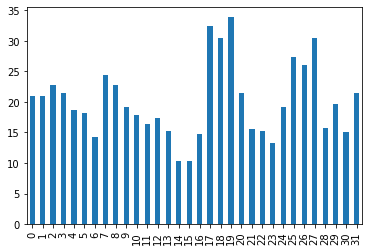

In [ ]:
mpg.plot(kind="bar")

<Axes: >

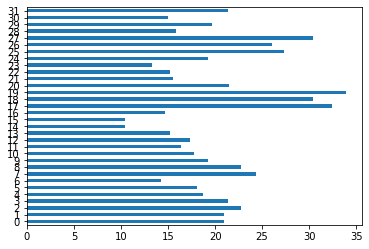

In [ ]:
mpg.plot(kind="barh")

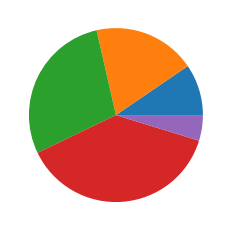

In [ ]:
# Pie charts
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

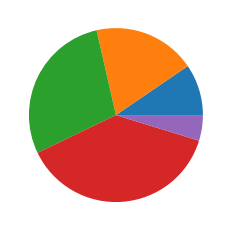

In [ ]:
plt.pie(x)
plt.savefig('/content/drive/My Drive/DataScience_Python_LinkedIn/MyCreatedFiles/pie_chart.png')
plt.show()

## Define Elements of a Plot

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

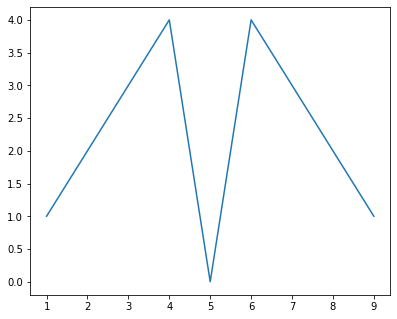

In [ ]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x,y)

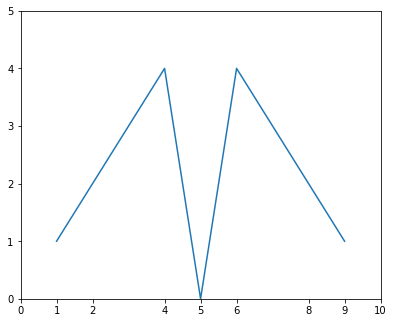

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

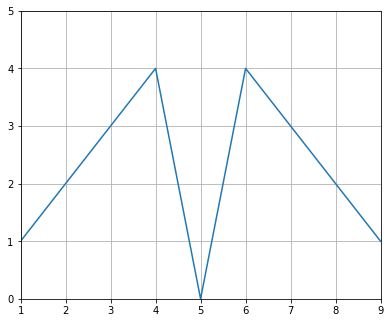

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

<Figure size 360x288 with 0 Axes>

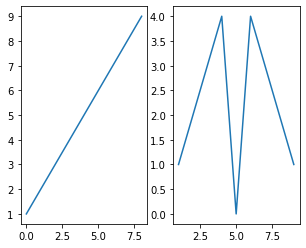

In [ ]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x)
ax2.plot(x,y)

## Plot Formatting

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

<BarContainer object of 9 artists>

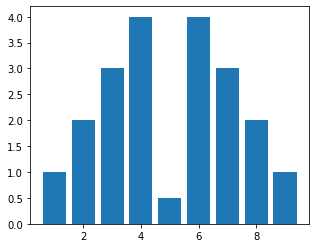

In [ ]:
x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x,y)

<BarContainer object of 9 artists>

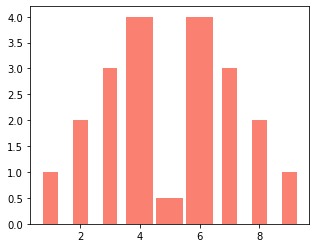

In [ ]:
wide = [.5,.5,.5,.9,.9,.9,.5,.5,.5]
color = ['salmon']

plt.bar(x, y, width = wide, color=color, align='center')

<ipython-input-52-c584229cc8b9>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


<Axes: >

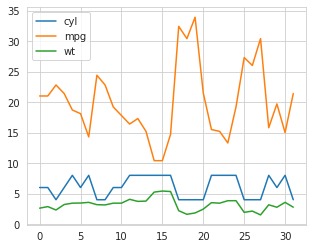

In [ ]:
address = '/content/drive/My Drive/DataScience_Python_LinkedIn/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'mpg', 'wt']]
df.plot()

<Axes: >

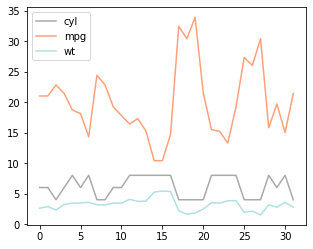

In [ ]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
df.plot(color=color_theme)

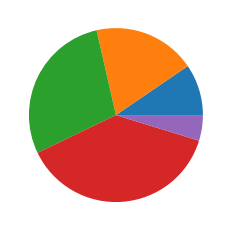

In [ ]:
z = [1,2,3,4,.5]
plt.pie(z)
plt.show()

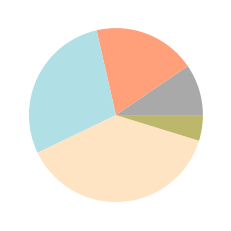

In [ ]:
color_theme = ['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4', '#BDB76B']
plt.pie(z, colors=color_theme)
plt.show()

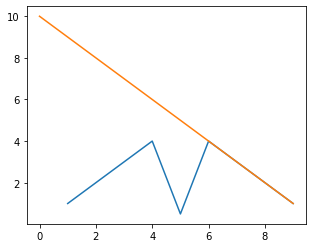

In [ ]:
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y)
plt.plot(x1,y1)

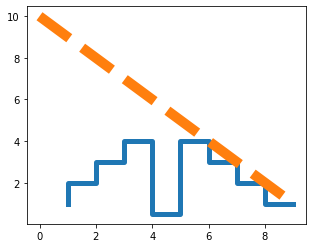

In [ ]:
plt.plot(x,y, ds='steps', lw=5)
plt.plot(x1,y1, ls='--', lw=10)

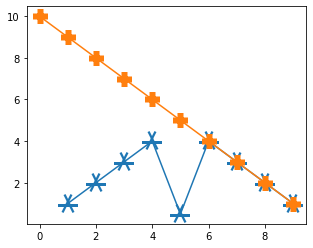

In [ ]:
plt.plot(x,y, marker='1', mew=20)
plt.plot(x1,y1, marker='+', mew=15)

## Creating Labels and Annotations

Text(0, 0.5, 'your y-axis label')

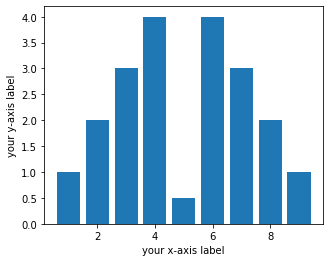

In [ ]:
x = range(1,10)
y = [1,2,3,4,.5,4,3,2,1]

plt.bar(x,y)
plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

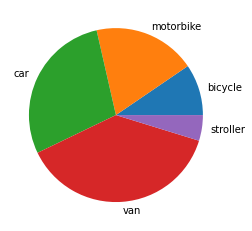

In [ ]:
z = [1,2,3,4,.5]
veh_type = ['bicycle', 'motorbike', 'car', 'van', 'stroller']

plt.pie(z, labels=veh_type)
plt.show()

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 15,4

Text(0, 0.5, 'miles/ gal')

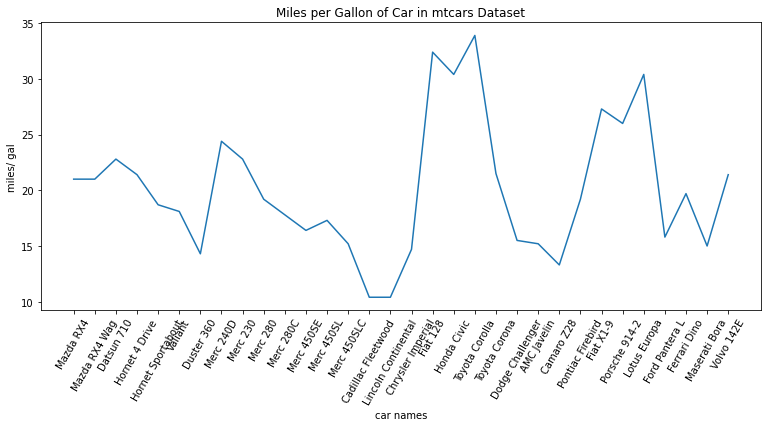

In [ ]:
mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars['Unnamed: 0'], rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Car in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/ gal')

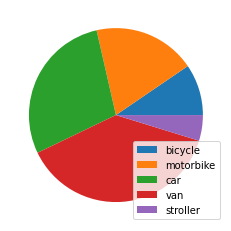

In [ ]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

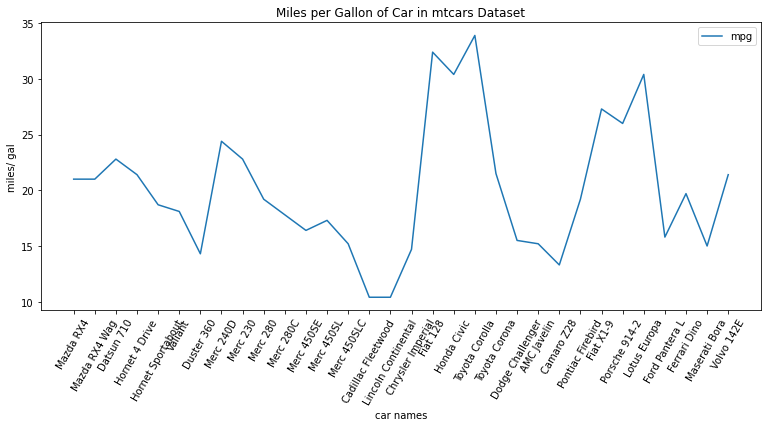

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars['Unnamed: 0'], rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Car in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/ gal')

ax.legend(loc='best')

In [ ]:
mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

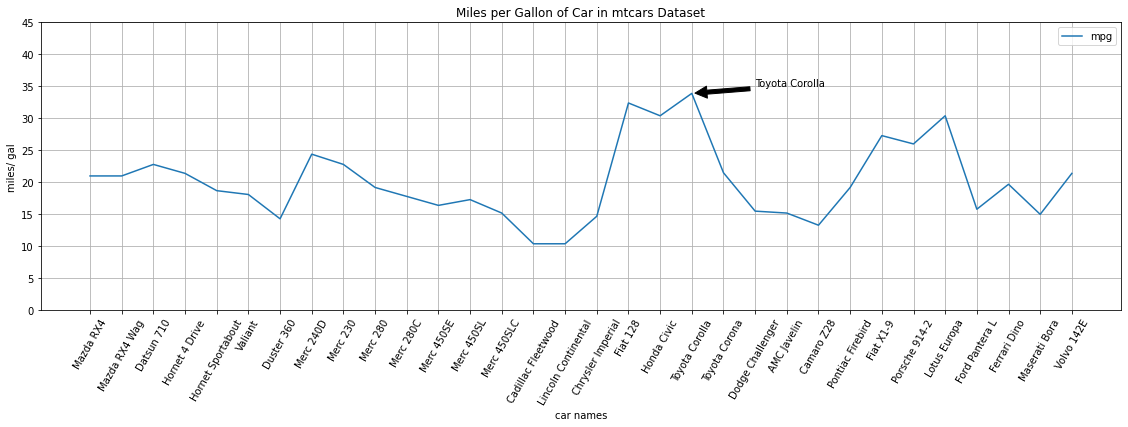

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))
ax.set_xticklabels(cars['Unnamed: 0'], rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Car in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/ gal')

ax.grid()

ax.legend(loc='best')

ax.set_ylim([0, 45])
ax.annotate('Toyota Corolla', xy=(19,33.9), xytext=(21,35), arrowprops=dict(facecolor='black', shrink=0.05))


## Visualizing Time Series

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [ ]:
address = '/content/drive/My Drive/DataScience_Python_LinkedIn/Data/Superstore-Sales.csv'
df = pd.read_csv(address, index_col='Order Date', encoding='cp1252', parse_dates=True)

df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<Axes: xlabel='Order Date'>

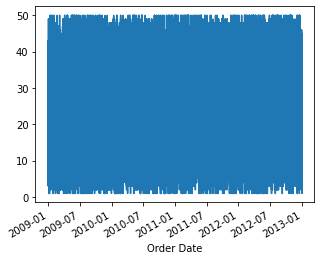

In [ ]:
df['Order Quantity'].plot()

<Axes: title={'center': 'Superstore Sales'}, xlabel='Order Date', ylabel='Order Quantity'>

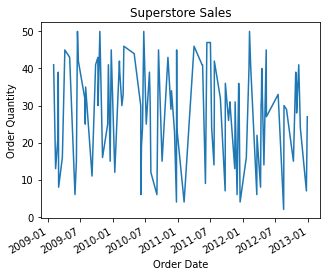

In [ ]:
df2 = df.sample(n=100, random_state=25, axis=0)

plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

## Creating Statistical Data Graphics

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
import seaborn as sb
sb.set_style('whitegrid')

In [ ]:
cars = cars.rename(columns={'Unnamed: 0': 'car_names'})

<Axes: ylabel='Frequency'>

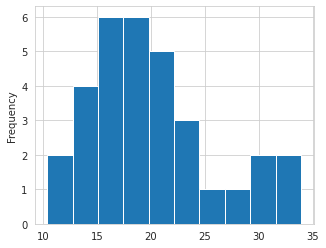

In [ ]:
cars.index = cars.car_names
mpg = cars['mpg']

mpg.plot(kind='hist')

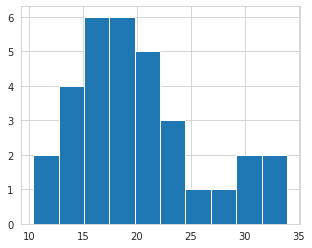

In [ ]:
plt.hist(mpg)
plt.show()

<ipython-input-61-93e5274d3d72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(mpg)


<Axes: xlabel='mpg', ylabel='Density'>

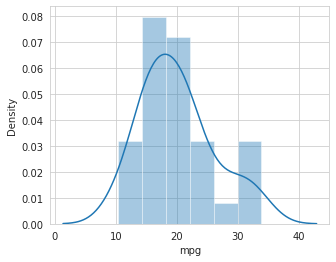

In [ ]:
sb.distplot(mpg)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='hp', ylabel='mpg'>

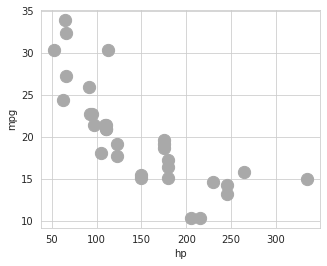

In [ ]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

<Axes: xlabel='hp', ylabel='mpg'>

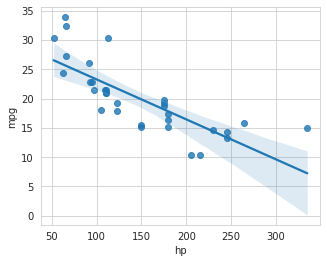

In [ ]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

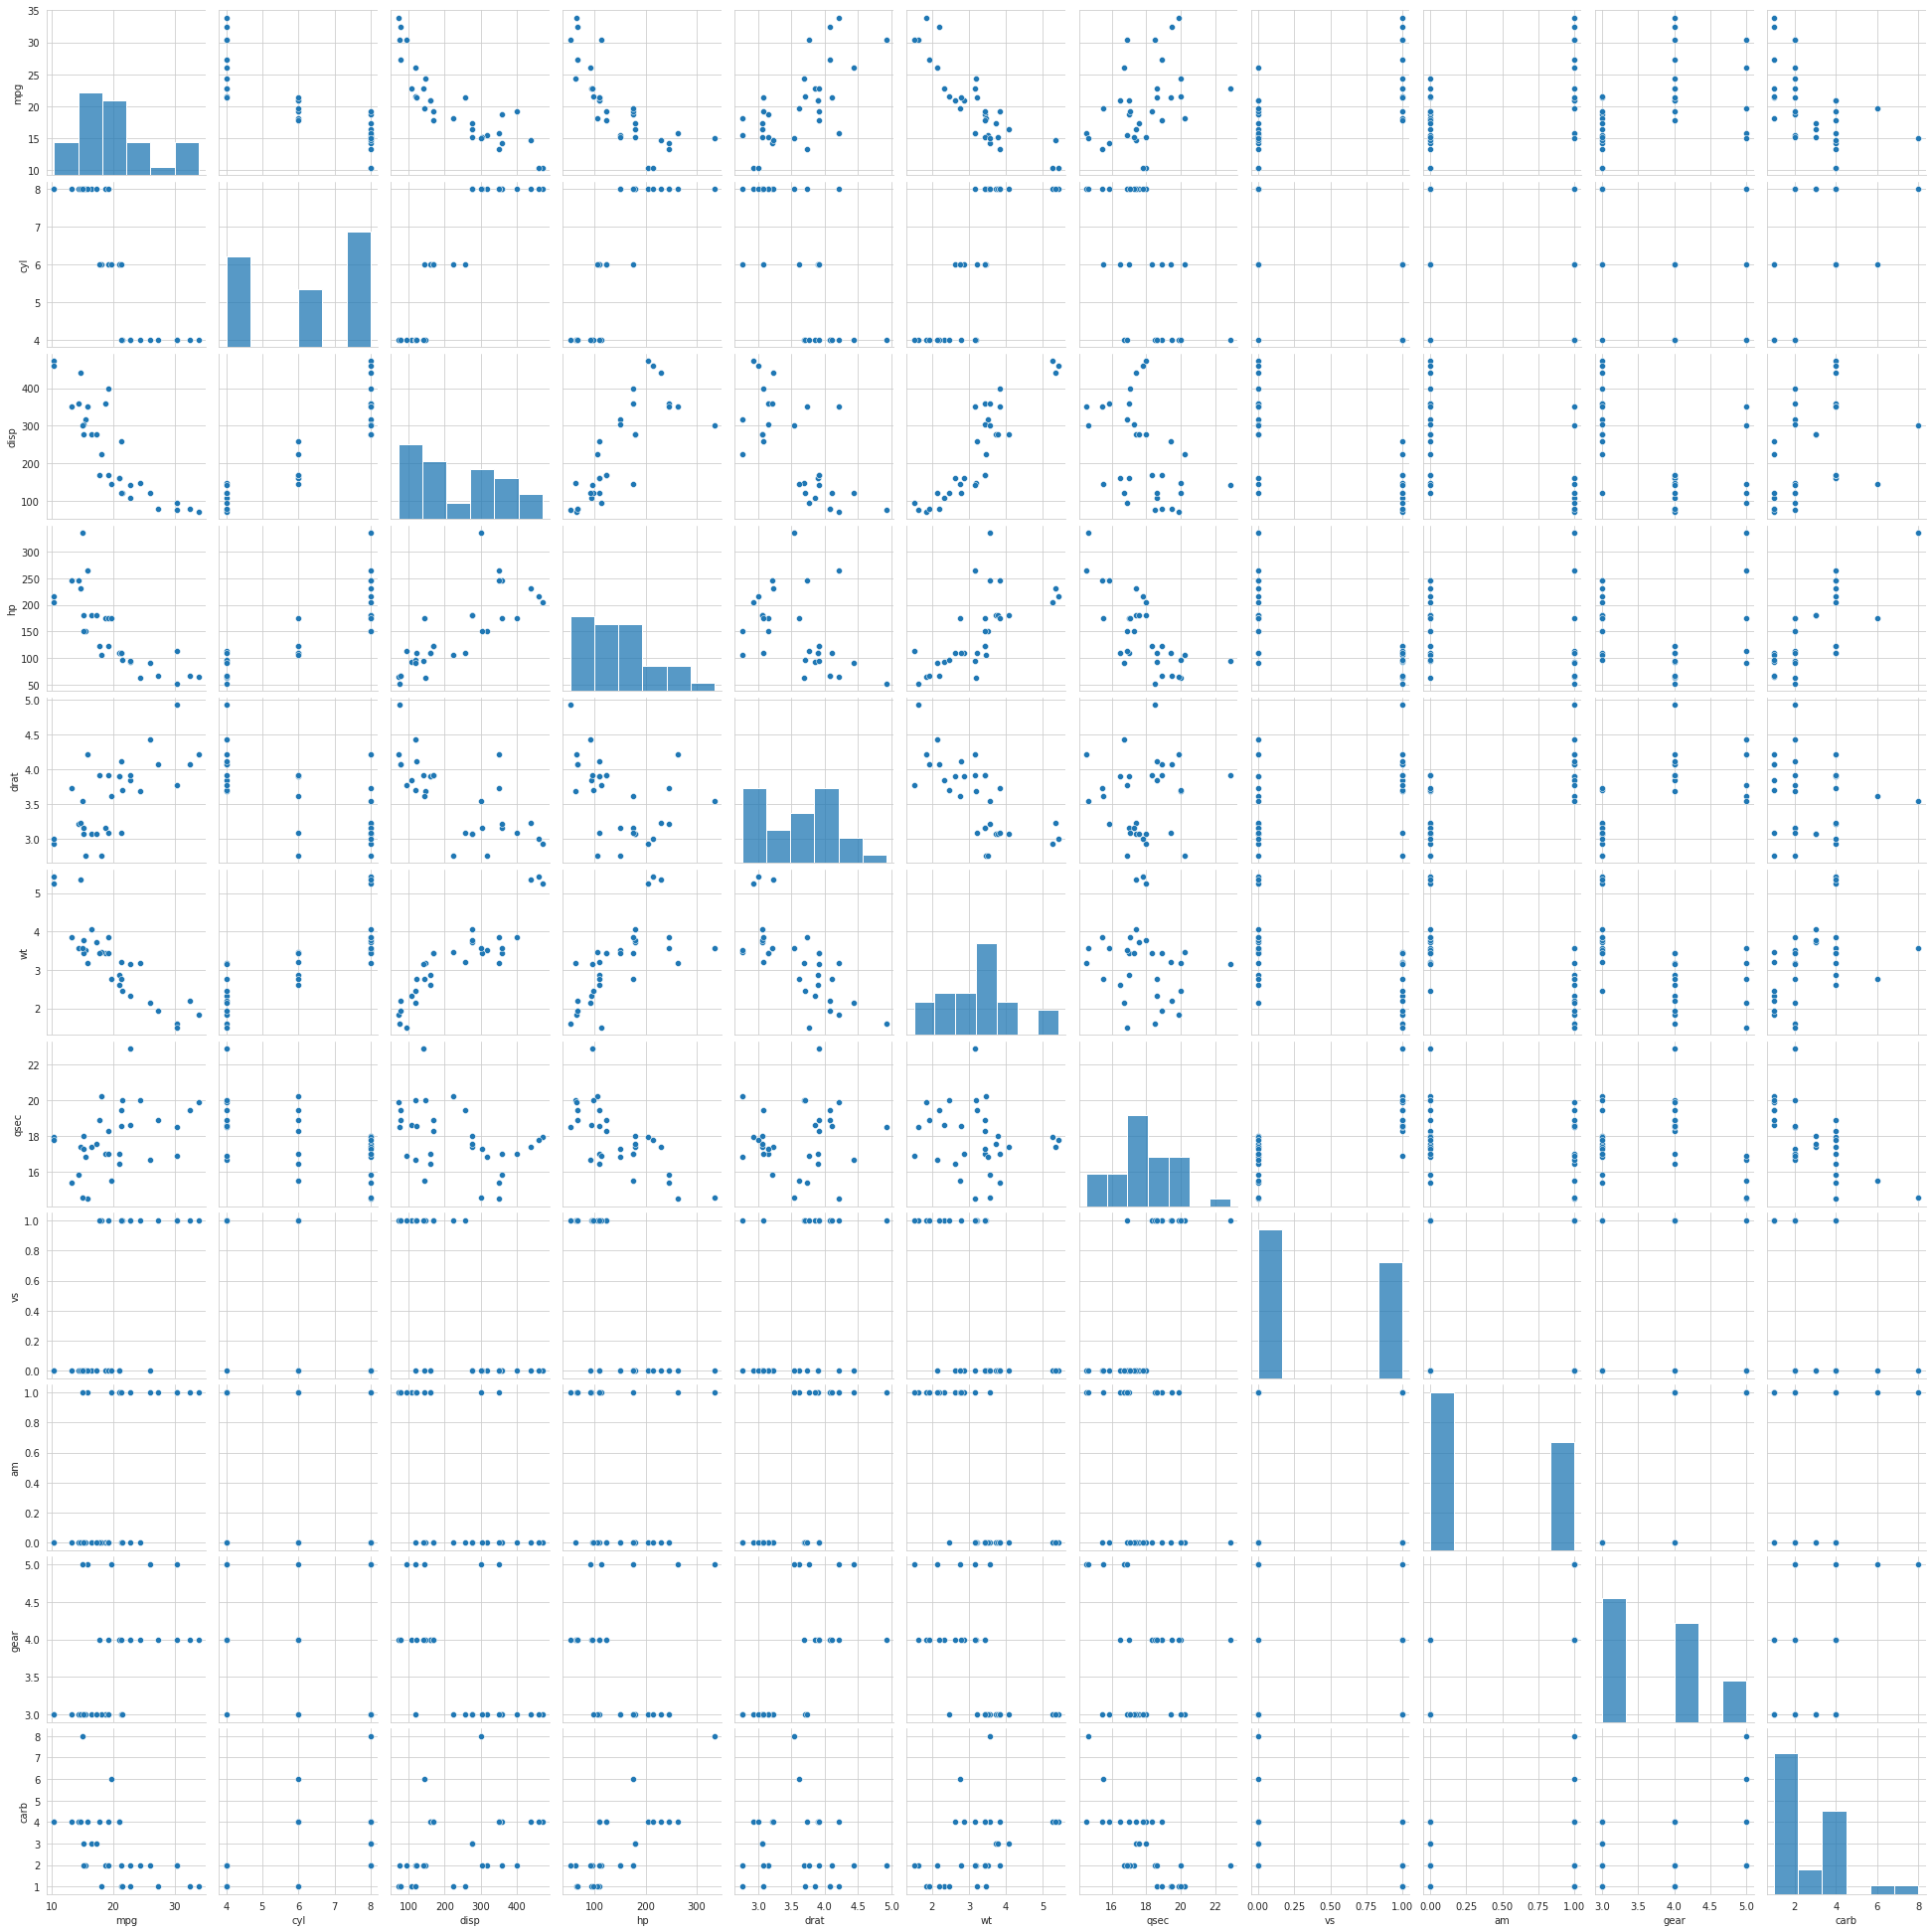

In [ ]:
sb.pairplot(cars)

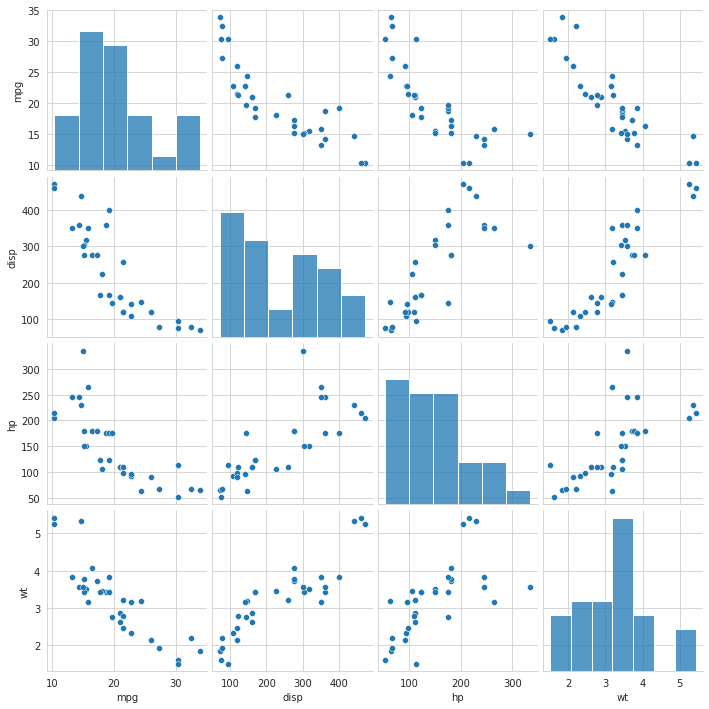

In [ ]:
cars_subset = cars[['mpg', 'disp', 'hp', 'wt']]
sb.pairplot(cars_subset)

<Axes: title={'center': 'wt'}, xlabel='am'>

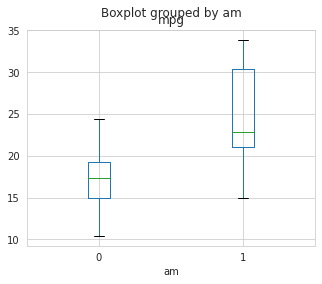

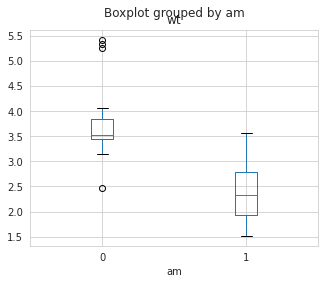

In [ ]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

<Axes: xlabel='am', ylabel='mpg'>

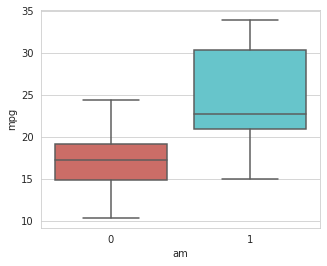

In [ ]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

# Basic Math and Statistic

## Simple Arithmetic

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
# Create arrays
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [ ]:
b = np.array([[10,20,30], [40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

In [ ]:
np.random.seed(25)
c = 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [ ]:
d = np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [ ]:
# Performing arithmetic on arrays

a*10

array([10, 20, 30, 40, 50, 60])

In [ ]:
c+a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [ ]:
c-a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [ ]:
c*a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [ ]:
c/a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

## Basic Linear Algebra

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
# Multiplying Matricesa and basic linear algebra

aa = np.array([[2.,4.,6.], [1.,3.,5.], [10.,20.,30.]])
aa

array([[ 2.,  4.,  6.],
       [ 1.,  3.,  5.],
       [10., 20., 30.]])

In [ ]:
bb = np.array([[0.,1.,2.],[3.,4.,5.], [6.,7.,8.]])
bb

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [ ]:
aa*bb

array([[  0.,   4.,  12.],
       [  3.,  12.,  25.],
       [ 60., 140., 240.]])

In [ ]:
np.dot(aa,bb)

array([[ 48.,  60.,  72.],
       [ 39.,  48.,  57.],
       [240., 300., 360.]])

## Generating Summary Statistics

In [ ]:
import scipy
from scipy import stats

In [ ]:
address = '/content/drive/My Drive/DataScience_Python_LinkedIn/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars = cars.rename(columns={'Unnamed: 0' : 'car_names'})
cars.head()

<ipython-input-3-f490bf0298e6>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Looking at summary statistics
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [ ]:
cars.sum(axis=1)

<ipython-input-94-3debe9f8dd45>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.sum(axis=1)


0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [ ]:
cars.median()

<ipython-input-95-d6e4d6149093>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.median()


mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [ ]:
cars.mean()

<ipython-input-96-9bac2de8474d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [ ]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp              472.0
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [ ]:
mgp = cars.mpg
mpg.idxmax()

'Toyota Corolla'

In [ ]:
cars.std()

<ipython-input-104-2f69368c0db2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.std()


mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [ ]:
gear = cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [ ]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Summarizing Categorical Data

In [ ]:
address = '/content/drive/My Drive/DataScience_Python_LinkedIn/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars = cars.rename(columns={'Unnamed: 0' : 'car_names'})
cars.index = cars.car_names
cars.head(15)

<ipython-input-4-24393273a7df>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cars.column = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
6     1
8     1
Name: carb, dtype: int64

In [ ]:
cars_cat = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [ ]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

In [ ]:
# Transforming variables to categorical data type
cars['group'] = pd.Series(cars.gear, dtype='category')

In [ ]:
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [ ]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [ ]:
# crosstabs
pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


## Parametric Correlation Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

<ipython-input-18-7da0029a5053>:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

<ipython-input-22-71840b4414c8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


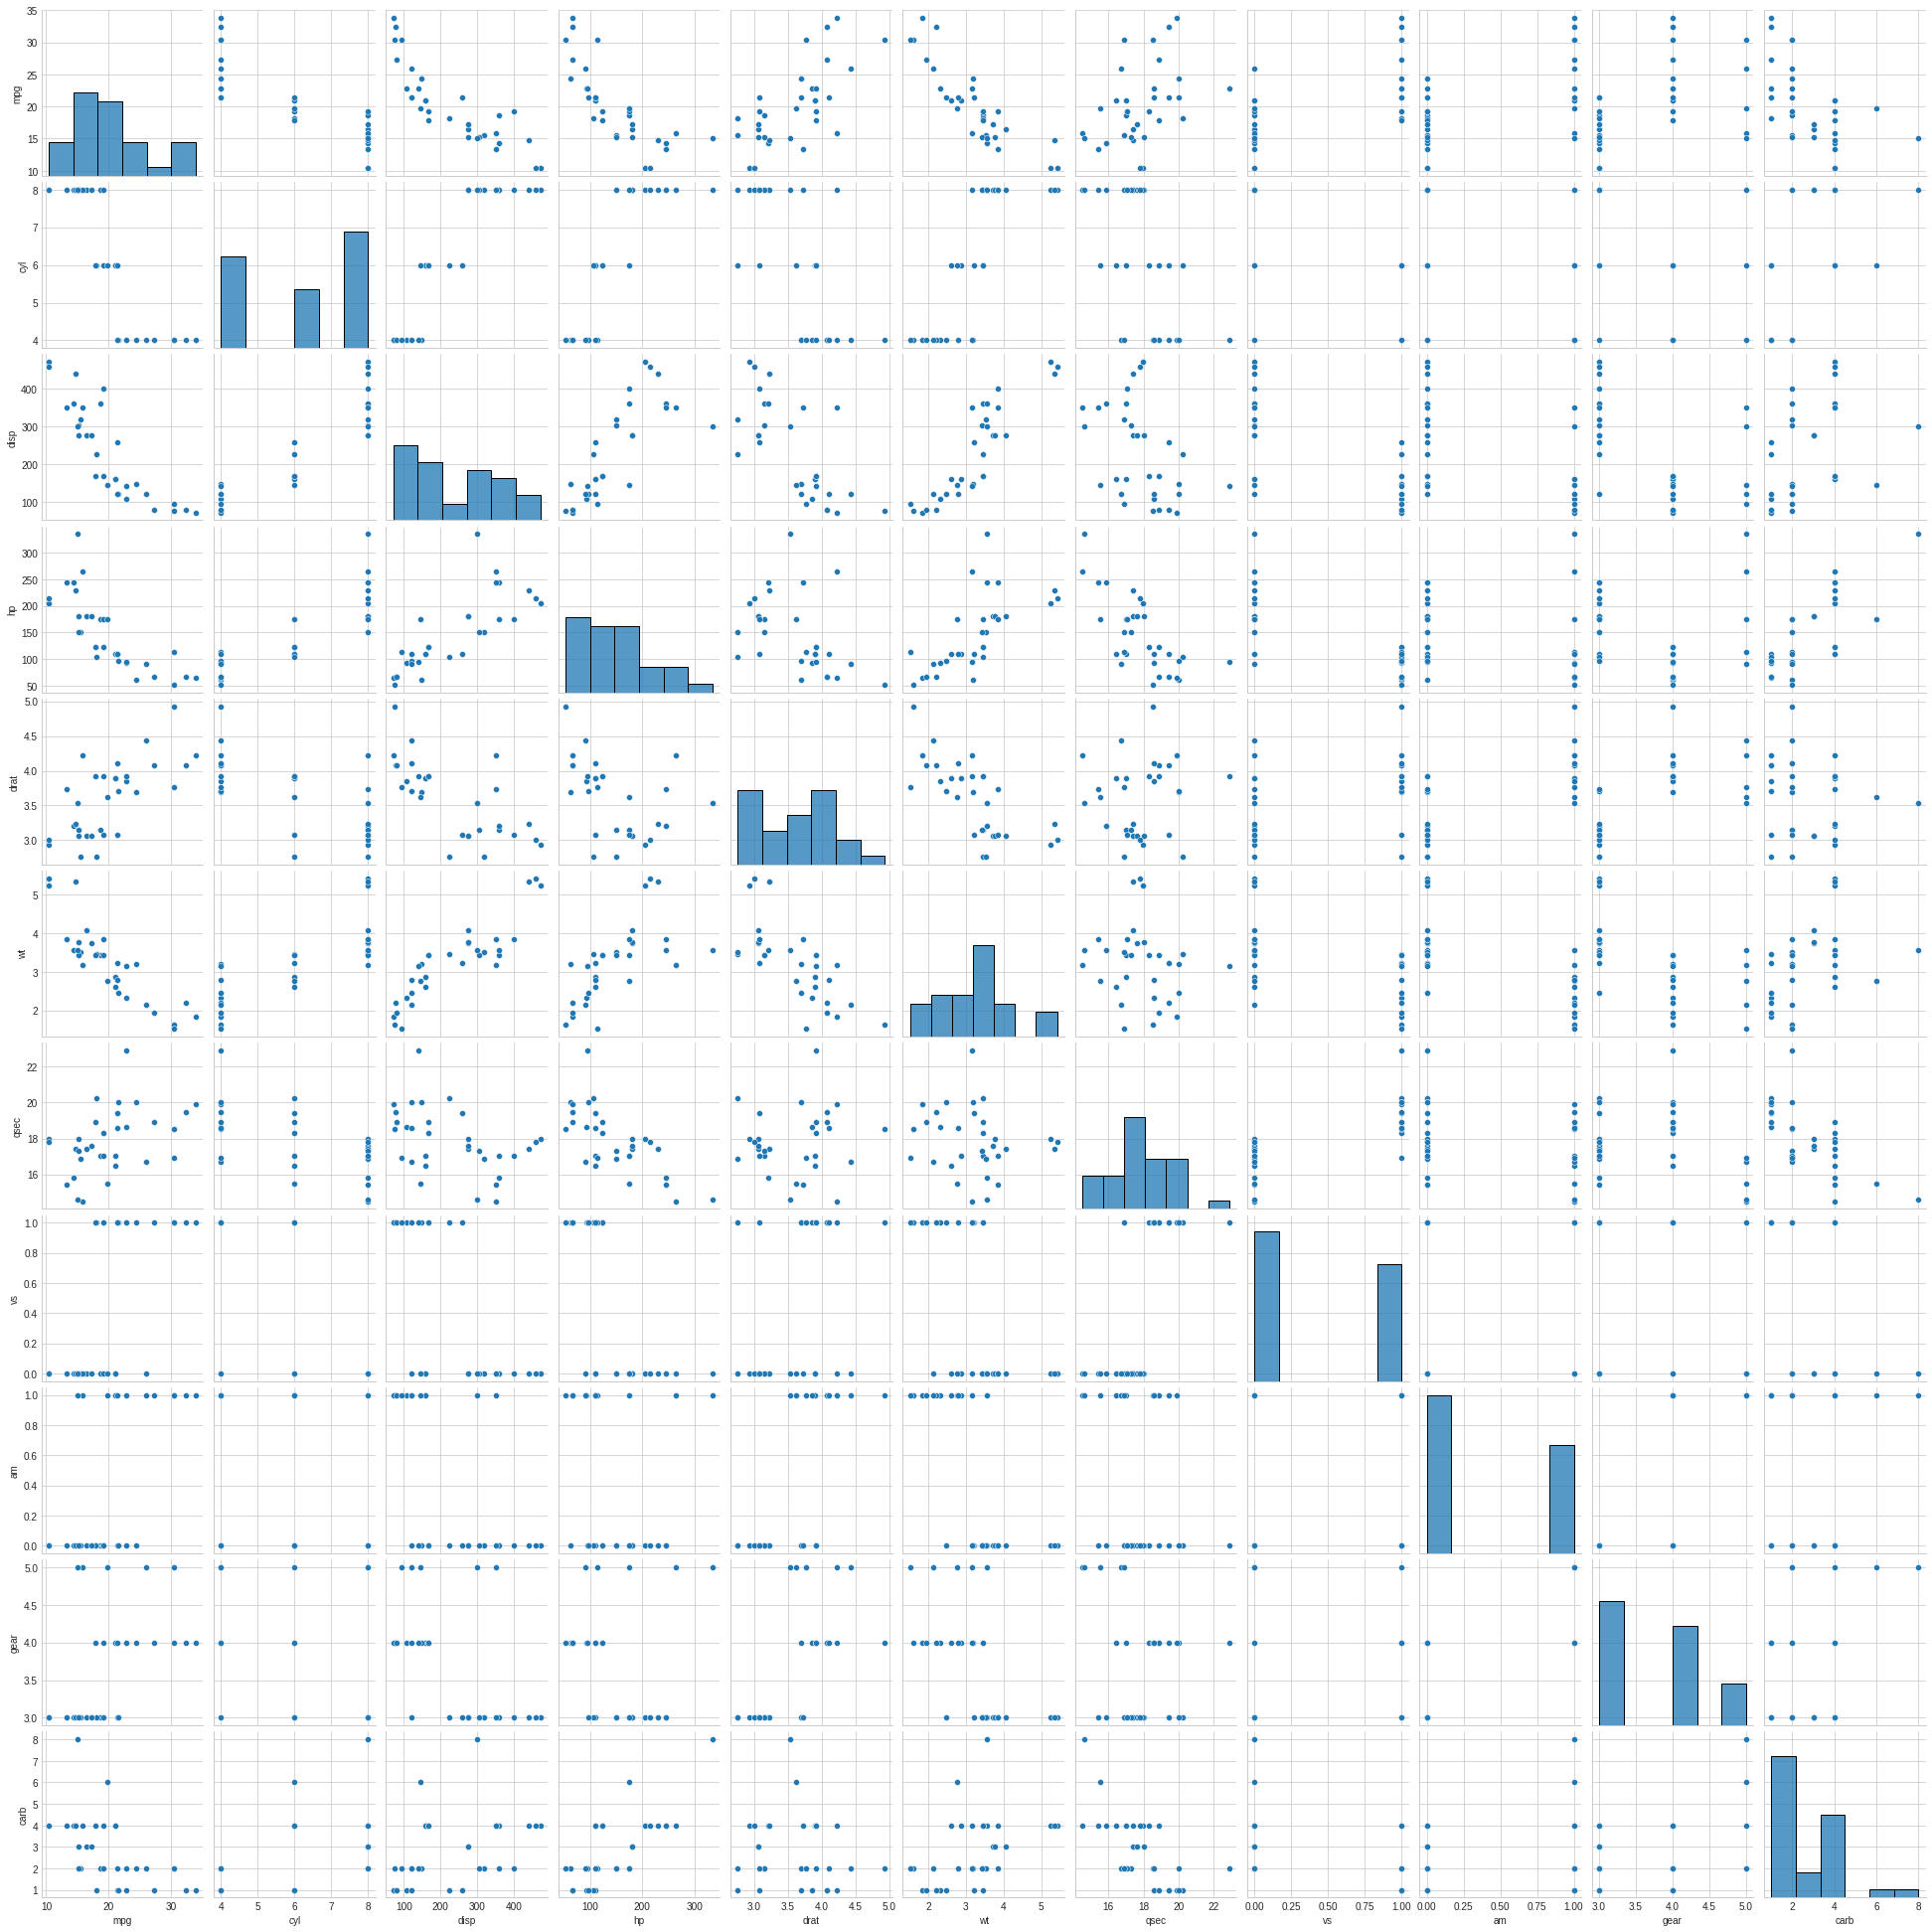

In [ ]:
sb.pairplot(cars)

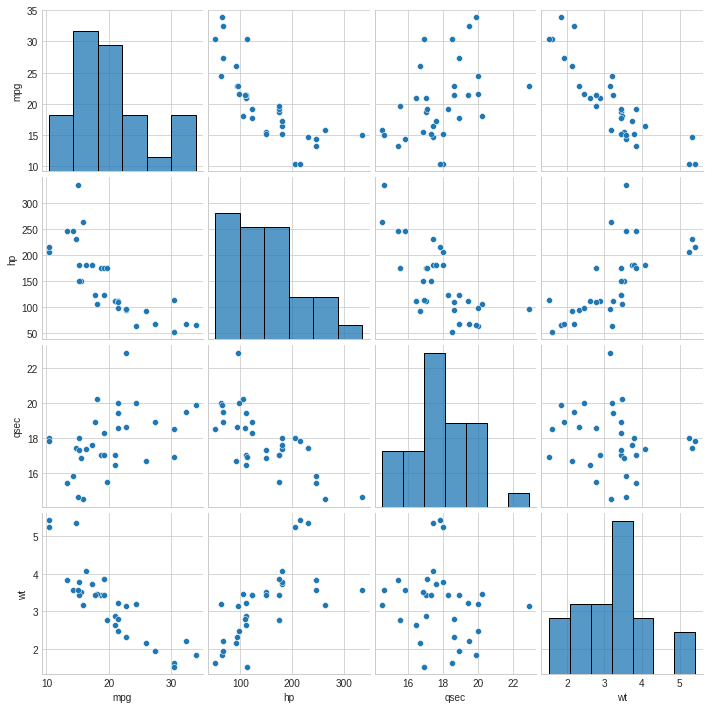

In [ ]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [ ]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_vaue = pearsonr(mpg, hp)
print('PearaonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PearaonR Correlation Coefficient -0.776


In [ ]:
pearsonr_coefficient, p_vaue = pearsonr(mpg, qsec)
print('PearaonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PearaonR Correlation Coefficient 0.419


In [ ]:
pearsonr_coefficient, p_vaue = pearsonr(mpg, wt)
print('PearaonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PearaonR Correlation Coefficient -0.868


In [ ]:
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


<Axes: >

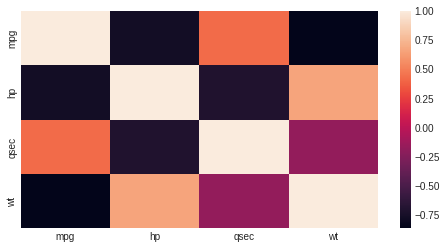

In [ ]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Non-Parametric Correlation Analysis

In [ ]:
from scipy.stats.stats import pearsonr, spearmanr

<ipython-input-36-ec723c63e7cc>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
<ipython-input-36-ec723c63e7cc>:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 14,7
plt.style.use('seaborn-whitegrid')

<ipython-input-31-3d5d16606308>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
car_names,,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


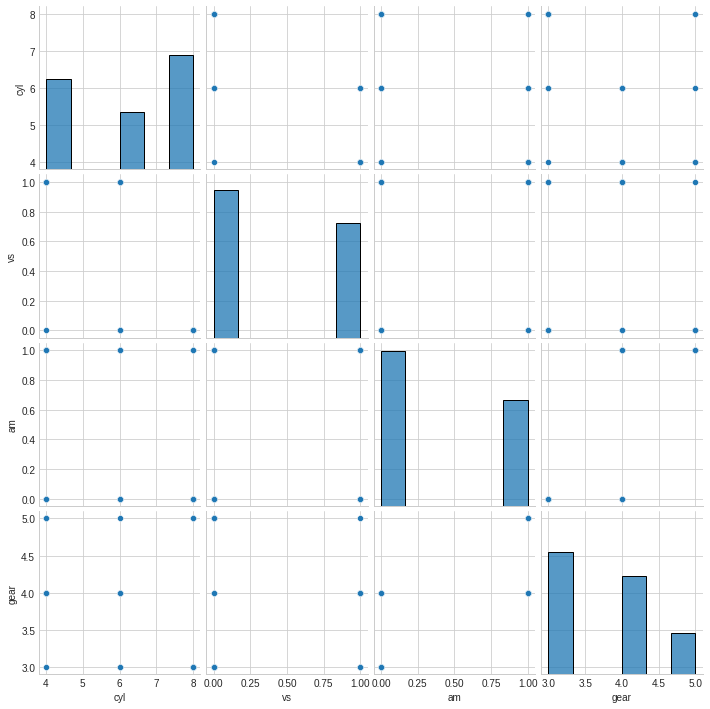

In [ ]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [ ]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


In [ ]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.522


In [ ]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


In [ ]:
# Chi-square test for independence

table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 8.741 p_value 0.013


In [ ]:
table = pd.crosstab(cyl, vs)

chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 21.340 p_value 0.000


In [ ]:
table = pd.crosstab(cyl, gear)

chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 18.036 p_value 0.001


## Transforming Dataset Distributions

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
plt.style.use('seaborn-whitegrid')

<ipython-input-45-98fb552a7ce1>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


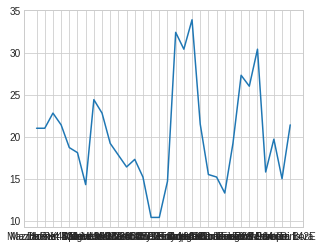

In [ ]:
mpg = cars.mpg
plt.plot(mpg)

In [ ]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


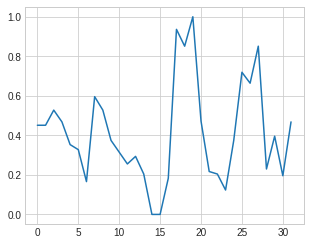

In [ ]:
mpg_matrix = mpg.values.reshape(-1,1)

scaled = preprocessing.MinMaxScaler()

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

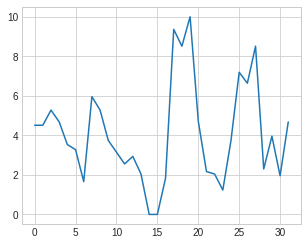

In [ ]:
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

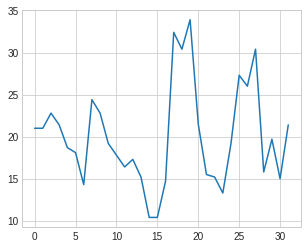

In [ ]:
# use scale function

standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

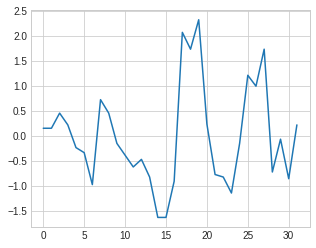

In [ ]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

## Extreme Value Analysis for Outliers

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
plt.style.use('seaborn-whitegrid')

In [ ]:
address = '/content/drive/My Drive/DataScience_Python_LinkedIn/Data/iris.data.csv'
df = pd.read_csv(filepath_or_buffer=address, header=None, sep=',')

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

In [ ]:
X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

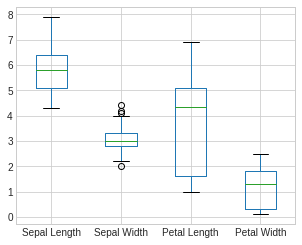

In [ ]:
df.boxplot(return_type='dict')
plt.plot()

In [ ]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [ ]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
print(X_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


## Multivariate Analysis for Outliers

<Axes: xlabel='Species', ylabel='Sepal Length'>

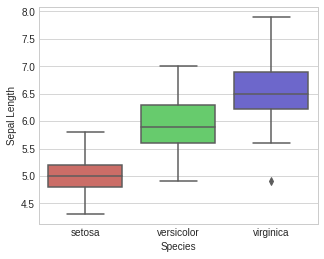

In [ ]:
data = df.iloc[:,0:4].values
target = df.iloc[:, 4].values

df[:5]

sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

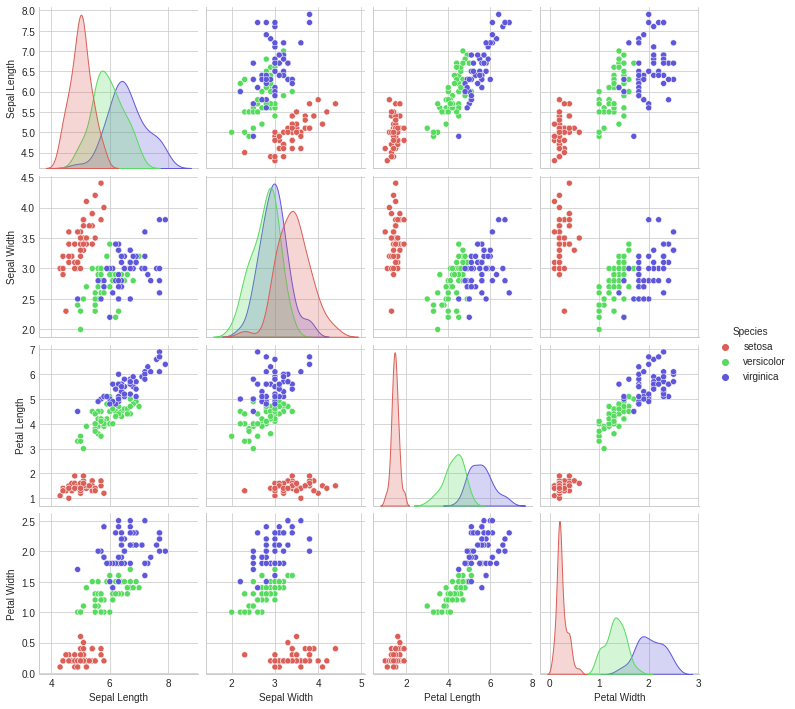

In [ ]:
sb.pairplot(df, hue='Species', palette='hls')

## Quiz

In [ ]:
cars['qsec'].describe()

count   32.0
mean    17.8
std      1.8
min     14.5
25%     16.9
50%     17.7
75%     18.9
max     22.9
Name: qsec, dtype: float64

In [ ]:
x=np.array([1,2,7])
y=np.array([3,8,9])
np.dot(x,y)

82

In [ ]:
xx=np.array([[7.,9.],[5.,12.]])
yy=np.array([[2.,8.],[7.,4.]])
xx*yy

array([[14., 72.],
       [35., 48.]])

In [ ]:
Q1= 1.714 
Q3=1.936

IQR = Q3-Q1
print(Q1-(1.5*IQR))
print(Q3+(1.5*IQR))

1.381
2.269


In [ ]:
pd.crosstab(cars['vs'], cars['cyl'])

cyl,4,6,8
vs,,,
0,1,3,14
1,10,4,0


# Data Sourcing via Web Scraping

## BeatifulSoup Object

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
print(sys.version)

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
our_html_document = '''
<html><head><title>IoT Articles</title></head>
<body>
<p class='title'><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>

<p class='description'>It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
<br>
<br>
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
<h1>Looking Back at My Coolest IoT Find in 2017</h1>
Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.com/blog/m2m-vs-iot/">IoT</a> had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.

It wasn’t until I got to the Ericsson Studio that I became extremely impressed by how far IoT has really come. Relying on the promise of the 5g network expansion, IoT-powered smart devices are on the cusp of an explosive growth in adoption. It was Ericsson’s Smart Car that sent me reeling:<a href="bit.ly/LPlNDJj"><img class="aligncenter size-full wp-image-3802" src="http://www.data-mania.com/blog/wp-content/uploads/2017/12/new-IoT-device-ideas.jpg" alt="Get your new iot device ideas here" width="1024" height="683" /></a>

This car is connected to Ericsson’s Connected Vehicle Cloud, an IoT platform that manages services for the Smart Cars to which it’s connected. The Volvo pictured above acts as a drop-off location for groceries that have been ordered by its owner.

To understand how it works, imagine you’re pulling your normal 9-to-5 and you know you need to grab some groceries on your way home. Well, since you’re smart you’ve used Ericsson IoT platform to connect your car to the local grocery delivery service (<a href="http://mat.se/">Mat.se</a>), so all you need to do is open the Mat.se app and make your usual order. Mat.se automatically handles the payment, grocery selection, delivery, and delivery scheduling. Since your car is IoT-enabled, Mat.se issues its trusted delivery agent a 1-time token to use for opening your car in order to place your groceries in your car for you at 4:40 pm (just before you get off from work).

To watch some of the amazing IoT device demos I witnessed at Ericsson Studio, make sure to go <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">watch the videos on this page</a></strong></span>.
<h1>Future Trends for IoT in 2018</h1>
New IoT device ideas won’t do you much good unless you at least know the basic technology trends that are set to impact IoT over the next year(s). These include:
<ol>
 	<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 	<li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 	<li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
</ol>
<h1>Best New IoT Device Ideas</h1>
This listing of new IoT device ideas has been sub-divided according to the main technology upon which the IoT devices are built. Below I’m providing a list of new IoT device ideas, but for detailed instructions on how to build these IoT applications, I recommend the <a href="https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&amp;mid=39197&amp;murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated">IoT courses on Udemy</a> (ß Please note: if you purchase a Udemy course through this link, I may receive a small commission), or courses that are available at <a href="http://www.skyfilabs.com/iot-online-courses">SkyFi</a> and <a href="https://www.coursera.org/specializations/iot">Coursera</a>.
<h2>Raspberry Pi IoT Ideas</h2>
Using Raspberry Pi as open-source hardware, you can build IoT applications that offer any one of the following benefits:
<ol>
 	<li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity</li>
 	<li>Build a system that detects discrepancies in electrical readings to identify electricity theft</li>
 	<li>Use IoT to build a Servo that is controlled by motion detection readings</li>
 	<li>Build a smart control switch that operates devices based on external stimuli. Use this for home automation.</li>
 	<li>Build a music playing application that enables music for each room in your house</li>
 	<li>Implement biometrics on IoT-connected devices</li>
</ol>
<h2>Arduino IoT Ideas</h2>
There are a number of new IoT device ideas that deploy Arduino as a microcontroller. These include:
<ol>
 	<li>Integrate Arduino with Android to build a remote-control RGB LED device.</li>
 	<li>Connect PIR sensors across the IoT to implement a smart building.</li>
 	<li>Build a temperature and sunlight sensor system to remotely monitor and control the conditions of your garden.</li>
 	<li>Deploy Arduino and IoT to automate your neighborhood streetlights.</li>
 	<li>Build a smart irrigation system based on IoT-connected temperature and moisture sensors built-in to your agricultural plants.</li>
</ol>
[caption id="attachment_3807" align="aligncenter" width="300"]<a href="bit.ly/LPlNDJj"><img class="wp-image-3807 size-medium" src="http://www.data-mania.com/blog/wp-content/uploads/2017/12/IMG_3058-300x295.jpg" alt="" width="300" height="295" /></a> An IoT Chatbot Tree at the Ericsson Studio[/caption]
<h2>Wireless (GSM) IoT Ideas</h2>
Several new IoT device ideas are developed around the GSM wireless network. Those are:
<ol>
 	<li>Monitor soil moisture to automate agricultural irrigation cycles.</li>
 	<li>Automate and control the conditions of a greenhouse.</li>
 	<li>Enable bio-metrics to build a smart security system for your home or office building</li>
 	<li>Build an autonomously operating fitness application that automatically makes recommendations based on motion detection and heart rate sensors that are embedded on wearable fitness trackers.</li>
 	<li>Build a healthcare monitoring system that tracks, informs, and automatically alerts healthcare providers based on sensor readings that describe a patients vital statistics (like temperature, pulse, blood pressure, etc).</li>
</ol>
<h2>IoT Automation Ideas</h2>
Almost all new IoT device ideas offer automation benefits, but to outline a few more ideas:
<ol>
 	<li>Build an IoT device that automatically locates and reports the closest nearby parking spot.</li>
 	<li>Build a motion detection system that automatically issues emails or sms messages to alert home owners of a likely home invasion.</li>
 	<li>Use temperature sensors connected across the IoT to automatically alert you if your home windows or doors have been left open.</li>
 	<li>Use bio-metric sensors to build a smart system that automate security for your home or office building</li>
</ol>
To learn more about IoT and what’s happening on the leading edge, be sure to pop over to Ericsson’s Studio Tour recap and <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">watch these videos</a></strong></span>.

<em>(I captured some of this content on behalf of DevMode Strategies during an invite-only tour of the Ericsson Studio in Kista. Rest assure, the text and opinions are my own</em>)
<p class='description'>...</p>
'''

In [ ]:
our_soup_obj = BeautifulSoup(our_html_document, 'html.parser')
print(our_soup_obj)


<html><head><title>IoT Articles</title></head>
<body>
<p class="title"><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>
<p class="description">It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
<br/>
<br/>
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
<h1>Looking Back at My Coolest IoT Find in 2017</h1>
Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.com/blog/m2m-vs-iot/">IoT</a> had been largely theoretical to me. Of course, I kno

In [ ]:
print(our_soup_obj.prettify()[0:300])

<html>
 <head>
  <title>
   IoT Articles
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
   </b>
  </p>
  <p class="description">
   It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article,


### Tag Objects

In [ ]:
soup_object = BeautifulSoup('<h1 attribute_1 = "Heading Level 1">Future Trends for IoT in 2018</h1>', "lxml") 

tag = soup_object.h1
type(tag)

bs4.element.Tag

In [ ]:
print(tag)

<h1 attribute_1="Heading Level 1">Future Trends for IoT in 2018</h1>


In [ ]:
tag.name

'h1'

In [ ]:
tag.name = 'heading 1'
tag

<heading 1 attribute_1="Heading Level 1">Future Trends for IoT in 2018</heading 1>

In [ ]:
tag.name

'heading 1'

In [ ]:
soup_object = BeautifulSoup('<h1 attribute_1 = "Heading Level 1">Future Trends for IoT in 2018</h1>', "lxml")
tag = soup_object.h1
tag

<h1 attribute_1="Heading Level 1">Future Trends for IoT in 2018</h1>

In [ ]:
tag['attribute_1']

'Heading Level 1'

In [ ]:
tag.attrs

{'attribute_1': 'Heading Level 1'}

In [ ]:
tag['attribute_2'] = 'Heading Level 1*'
tag.attrs

{'attribute_1': 'Heading Level 1', 'attribute_2': 'Heading Level 1*'}

In [ ]:
tag

<h1 attribute_1="Heading Level 1" attribute_2="Heading Level 1*">Future Trends for IoT in 2018</h1>

In [ ]:
del tag['attribute_2']
tag

<h1 attribute_1="Heading Level 1">Future Trends for IoT in 2018</h1>

In [ ]:
del tag['attribute_1']
tag

<h1>Future Trends for IoT in 2018</h1>

In [ ]:
our_html_document = '''
<html><head><title>IoT Articles</title></head>
<body>
<p class='title'><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>

<p class='description'>It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
<br>
<br>
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
<h1>Looking Back at My Coolest IoT Find in 2017</h1>
Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.com/blog/m2m-vs-iot/">IoT</a> had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.

It wasn’t until I got to the Ericsson Studio that I became extremely impressed by how far IoT has really come. Relying on the promise of the 5g network expansion, IoT-powered smart devices are on the cusp of an explosive growth in adoption. It was Ericsson’s Smart Car that sent me reeling:<a href="bit.ly/LPlNDJj"><img class="aligncenter size-full wp-image-3802" src="http://www.data-mania.com/blog/wp-content/uploads/2017/12/new-IoT-device-ideas.jpg" alt="Get your new iot device ideas here" width="1024" height="683" /></a>

This car is connected to Ericsson’s Connected Vehicle Cloud, an IoT platform that manages services for the Smart Cars to which it’s connected. The Volvo pictured above acts as a drop-off location for groceries that have been ordered by its owner.

To understand how it works, imagine you’re pulling your normal 9-to-5 and you know you need to grab some groceries on your way home. Well, since you’re smart you’ve used Ericsson IoT platform to connect your car to the local grocery delivery service (<a href="http://mat.se/">Mat.se</a>), so all you need to do is open the Mat.se app and make your usual order. Mat.se automatically handles the payment, grocery selection, delivery, and delivery scheduling. Since your car is IoT-enabled, Mat.se issues its trusted delivery agent a 1-time token to use for opening your car in order to place your groceries in your car for you at 4:40 pm (just before you get off from work).

To watch some of the amazing IoT device demos I witnessed at Ericsson Studio, make sure to go <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">watch the videos on this page</a></strong></span>.
<h1>Future Trends for IoT in 2018</h1>
New IoT device ideas won’t do you much good unless you at least know the basic technology trends that are set to impact IoT over the next year(s). These include:
<ol>
 	<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 	<li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 	<li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
</ol>
<h1>Best New IoT Device Ideas</h1>
This listing of new IoT device ideas has been sub-divided according to the main technology upon which the IoT devices are built. Below I’m providing a list of new IoT device ideas, but for detailed instructions on how to build these IoT applications, I recommend the <a href="https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&amp;mid=39197&amp;murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated">IoT courses on Udemy</a> (ß Please note: if you purchase a Udemy course through this link, I may receive a small commission), or courses that are available at <a href="http://www.skyfilabs.com/iot-online-courses">SkyFi</a> and <a href="https://www.coursera.org/specializations/iot">Coursera</a>.
<h2>Raspberry Pi IoT Ideas</h2>
Using Raspberry Pi as open-source hardware, you can build IoT applications that offer any one of the following benefits:
<ol>
 	<li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity</li>
 	<li>Build a system that detects discrepancies in electrical readings to identify electricity theft</li>
 	<li>Use IoT to build a Servo that is controlled by motion detection readings</li>
 	<li>Build a smart control switch that operates devices based on external stimuli. Use this for home automation.</li>
 	<li>Build a music playing application that enables music for each room in your house</li>
 	<li>Implement biometrics on IoT-connected devices</li>
</ol>
<h2>Arduino IoT Ideas</h2>
There are a number of new IoT device ideas that deploy Arduino as a microcontroller. These include:
<ol>
 	<li>Integrate Arduino with Android to build a remote-control RGB LED device.</li>
 	<li>Connect PIR sensors across the IoT to implement a smart building.</li>
 	<li>Build a temperature and sunlight sensor system to remotely monitor and control the conditions of your garden.</li>
 	<li>Deploy Arduino and IoT to automate your neighborhood streetlights.</li>
 	<li>Build a smart irrigation system based on IoT-connected temperature and moisture sensors built-in to your agricultural plants.</li>
</ol>
[caption id="attachment_3807" align="aligncenter" width="300"]<a href="bit.ly/LPlNDJj"><img class="wp-image-3807 size-medium" src="http://www.data-mania.com/blog/wp-content/uploads/2017/12/IMG_3058-300x295.jpg" alt="" width="300" height="295" /></a> An IoT Chatbot Tree at the Ericsson Studio[/caption]
<h2>Wireless (GSM) IoT Ideas</h2>
Several new IoT device ideas are developed around the GSM wireless network. Those are:
<ol>
 	<li>Monitor soil moisture to automate agricultural irrigation cycles.</li>
 	<li>Automate and control the conditions of a greenhouse.</li>
 	<li>Enable bio-metrics to build a smart security system for your home or office building</li>
 	<li>Build an autonomously operating fitness application that automatically makes recommendations based on motion detection and heart rate sensors that are embedded on wearable fitness trackers.</li>
 	<li>Build a healthcare monitoring system that tracks, informs, and automatically alerts healthcare providers based on sensor readings that describe a patients vital statistics (like temperature, pulse, blood pressure, etc).</li>
</ol>
<h2>IoT Automation Ideas</h2>
Almost all new IoT device ideas offer automation benefits, but to outline a few more ideas:
<ol>
 	<li>Build an IoT device that automatically locates and reports the closest nearby parking spot.</li>
 	<li>Build a motion detection system that automatically issues emails or sms messages to alert home owners of a likely home invasion.</li>
 	<li>Use temperature sensors connected across the IoT to automatically alert you if your home windows or doors have been left open.</li>
 	<li>Use bio-metric sensors to build a smart system that automate security for your home or office building</li>
</ol>
To learn more about IoT and what’s happening on the leading edge, be sure to pop over to Ericsson’s Studio Tour recap and <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">watch these videos</a></strong></span>.

<em>(I captured some of this content on behalf of DevMode Strategies during an invite-only tour of the Ericsson Studio in Kista. Rest assure, the text and opinions are my own</em>)
<p class='description'>...</p>
'''

In [ ]:
our_soup_object = BeautifulSoup(our_html_document, 'html.parser')

In [ ]:
our_soup_object.head

<head><title>IoT Articles</title></head>

In [ ]:
our_soup_object.title

<title>IoT Articles</title>

In [ ]:
our_soup_object.body.b

<b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b>

In [ ]:
our_soup_object.body

<body>
<p class="title"><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>
<p class="description">It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
<br/>
<br/>
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
<h1>Looking Back at My Coolest IoT Find in 2017</h1>
Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.com/blog/m2m-vs-iot/">IoT</a> had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-

In [ ]:
our_soup_object.li

<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>

In [ ]:
our_soup_object.a

<a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a>

## NavigatableString Objects

### NavigatableString objects

In [ ]:
soup_object = BeautifulSoup('<h1 attribute_1 = "Heading Level 1">Future Trends in IoT in 2018</h1>', 'lxml')

tag = soup_object.h1
type(tag)

bs4.element.Tag

In [ ]:
tag.name

'h1'

In [ ]:
tag.string

'Future Trends in IoT in 2018'

In [ ]:
type(tag.string)

bs4.element.NavigableString

In [ ]:
our_navigatable_string = tag.string
our_navigatable_string

'NaN'

In [ ]:
our_navigatable_string.replace_with('NaN')
tag.string

'NaN'

In [ ]:
our_html_document = '''
<html><head><title>IoT Articles</title></head>
<body>
<p class='title'><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>

<p class='description'>It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
<br>
<br>
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
<h1>Looking Back at My Coolest IoT Find in 2017</h1>
Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.com/blog/m2m-vs-iot/">IoT</a> had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.

It wasn’t until I got to the Ericsson Studio that I became extremely impressed by how far IoT has really come. Relying on the promise of the 5g network expansion, IoT-powered smart devices are on the cusp of an explosive growth in adoption. It was Ericsson’s Smart Car that sent me reeling:<a href="bit.ly/LPlNDJj"><img class="aligncenter size-full wp-image-3802" src="http://www.data-mania.com/blog/wp-content/uploads/2017/12/new-IoT-device-ideas.jpg" alt="Get your new iot device ideas here" width="1024" height="683" /></a>

This car is connected to Ericsson’s Connected Vehicle Cloud, an IoT platform that manages services for the Smart Cars to which it’s connected. The Volvo pictured above acts as a drop-off location for groceries that have been ordered by its owner.

To understand how it works, imagine you’re pulling your normal 9-to-5 and you know you need to grab some groceries on your way home. Well, since you’re smart you’ve used Ericsson IoT platform to connect your car to the local grocery delivery service (<a href="http://mat.se/">Mat.se</a>), so all you need to do is open the Mat.se app and make your usual order. Mat.se automatically handles the payment, grocery selection, delivery, and delivery scheduling. Since your car is IoT-enabled, Mat.se issues its trusted delivery agent a 1-time token to use for opening your car in order to place your groceries in your car for you at 4:40 pm (just before you get off from work).

To watch some of the amazing IoT device demos I witnessed at Ericsson Studio, make sure to go <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">watch the videos on this page</a></strong></span>.
<h1>Future Trends for IoT in 2018</h1>
New IoT device ideas won’t do you much good unless you at least know the basic technology trends that are set to impact IoT over the next year(s). These include:
<ol>
 	<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 	<li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 	<li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
</ol>
<h1>Best New IoT Device Ideas</h1>
This listing of new IoT device ideas has been sub-divided according to the main technology upon which the IoT devices are built. Below I’m providing a list of new IoT device ideas, but for detailed instructions on how to build these IoT applications, I recommend the <a href="https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&amp;mid=39197&amp;murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated">IoT courses on Udemy</a> (ß Please note: if you purchase a Udemy course through this link, I may receive a small commission), or courses that are available at <a href="http://www.skyfilabs.com/iot-online-courses">SkyFi</a> and <a href="https://www.coursera.org/specializations/iot">Coursera</a>.
<h2>Raspberry Pi IoT Ideas</h2>
Using Raspberry Pi as open-source hardware, you can build IoT applications that offer any one of the following benefits:
<ol>
 	<li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity</li>
 	<li>Build a system that detects discrepancies in electrical readings to identify electricity theft</li>
 	<li>Use IoT to build a Servo that is controlled by motion detection readings</li>
 	<li>Build a smart control switch that operates devices based on external stimuli. Use this for home automation.</li>
 	<li>Build a music playing application that enables music for each room in your house</li>
 	<li>Implement biometrics on IoT-connected devices</li>
</ol>
<h2>Arduino IoT Ideas</h2>
There are a number of new IoT device ideas that deploy Arduino as a microcontroller. These include:
<ol>
 	<li>Integrate Arduino with Android to build a remote-control RGB LED device.</li>
 	<li>Connect PIR sensors across the IoT to implement a smart building.</li>
 	<li>Build a temperature and sunlight sensor system to remotely monitor and control the conditions of your garden.</li>
 	<li>Deploy Arduino and IoT to automate your neighborhood streetlights.</li>
 	<li>Build a smart irrigation system based on IoT-connected temperature and moisture sensors built-in to your agricultural plants.</li>
</ol>
[caption id="attachment_3807" align="aligncenter" width="300"]<a href="bit.ly/LPlNDJj"><img class="wp-image-3807 size-medium" src="http://www.data-mania.com/blog/wp-content/uploads/2017/12/IMG_3058-300x295.jpg" alt="" width="300" height="295" /></a> An IoT Chatbot Tree at the Ericsson Studio[/caption]
<h2>Wireless (GSM) IoT Ideas</h2>
Several new IoT device ideas are developed around the GSM wireless network. Those are:
<ol>
 	<li>Monitor soil moisture to automate agricultural irrigation cycles.</li>
 	<li>Automate and control the conditions of a greenhouse.</li>
 	<li>Enable bio-metrics to build a smart security system for your home or office building</li>
 	<li>Build an autonomously operating fitness application that automatically makes recommendations based on motion detection and heart rate sensors that are embedded on wearable fitness trackers.</li>
 	<li>Build a healthcare monitoring system that tracks, informs, and automatically alerts healthcare providers based on sensor readings that describe a patients vital statistics (like temperature, pulse, blood pressure, etc).</li>
</ol>
<h2>IoT Automation Ideas</h2>
Almost all new IoT device ideas offer automation benefits, but to outline a few more ideas:
<ol>
 	<li>Build an IoT device that automatically locates and reports the closest nearby parking spot.</li>
 	<li>Build a motion detection system that automatically issues emails or sms messages to alert home owners of a likely home invasion.</li>
 	<li>Use temperature sensors connected across the IoT to automatically alert you if your home windows or doors have been left open.</li>
 	<li>Use bio-metric sensors to build a smart system that automate security for your home or office building</li>
</ol>
To learn more about IoT and what’s happening on the leading edge, be sure to pop over to Ericsson’s Studio Tour recap and <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">watch these videos</a></strong></span>.

<em>(I captured some of this content on behalf of DevMode Strategies during an invite-only tour of the Ericsson Studio in Kista. Rest assure, the text and opinions are my own</em>)
<p class='description'>...</p>
'''
our_soup_object = BeautifulSoup(our_html_document, 'html.parser')

In [ ]:
for string in our_soup_object.stripped_strings:
  print(repr(string))

'IoT Articles'
'2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers'
'It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...'
'It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.'
'Looking Back at My Coolest IoT Find in 2017'
'Before going into detail about best new IoT device ideas, here’s the backstory.'
'Last month Ericsson Digital invited me'
'to tour the Ericsson Studio in Kista, Sweden. Up until that visit,'
'IoT'
'had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.\n\nIt wasn’t until I got t

In [ ]:
first_link = our_soup_object.a
first_link

<a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a>

In [ ]:
first_link.parent

<strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong>

In [ ]:
first_link.string

'Last month Ericsson Digital invited me'

In [ ]:
first_link.string.parent

<a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a>

## Data Parsing

In [ ]:
from bs4 import BeautifulSoup

import urllib
import urllib.request
import re

In [ ]:
with urllib.request.urlopen('https://raw.githubusercontent.com/BigDataGal/Data-Mania-Demos/master/IoT-2018.html') as response:
  html = response.read()

In [ ]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

#### Parsing Data

In [ ]:
print(soup.prettify()[0:100])

<html>
 <head>
  <title>
   IoT Articles
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    


#### Getting Data from a Parse Tree

In [ ]:
text_only = soup.get_text()
print(text_only)

#### Searching an retrieving Data from a Parse Tree

In [ ]:
soup.find_all('li') # filtering with tag

In [ ]:
soup.find_all(id="link 7") # filtering with keyword

[<a class="preview" href="http://www.skyfilabs.com/iot-online-courses" id="link 7">SkyFi</a>]

In [ ]:
# filtering with string arguments
soup.find_all('ol')

[<ol>
 <li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
 </ol>, <ol>
 <li>Enable built-in sensing to build a weather station that measures ambient temperatu

In [ ]:
# filtering with list objects
soup.find_all(['ol', 'b'])

[<b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b>,
 <ol>
 <li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
 </ol>,
 <ol>
 <li

In [ ]:
# filter with reg expression
t = re.compile("t")
for tag in soup.find_all(t):
  print(tag.name)

html
title
strong
strong
strong
strong
strong
strong


In [ ]:
# filter with boolean
for tag in soup.find_all(True):
  print(tag.name)

In [ ]:
# filtering weblinks with string objects
for link in soup.find_all('a'):
  print(link.get('href'))

http://bit.ly/LPlNDJj
http://www.data-mania.com/blog/m2m-vs-iot/
bit.ly/LPlNDJj
http://mat.se/
http://bit.ly/LPlNDJj
https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&mid=39197&murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated
http://www.skyfilabs.com/iot-online-courses
https://www.coursera.org/specializations/iot
bit.ly/LPlNDJj
http://bit.ly/LPlNDJj


In [ ]:
# retrieve string with regex
soup.find_all(string=re.compile("data"))

[' & Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.']

## Web Scraping in Practice

In [ ]:
from IPython.display import HTML

In [ ]:
r = urllib.request.urlopen('https://analytics.usa.gov/').read()
soup = BeautifulSoup(r, "lxml")
type(soup)

bs4.BeautifulSoup

In [ ]:
print(soup.prettify()[0:100])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--



In [ ]:
for link in soup.find_all('a'):
  print(link.get('href'))

In [ ]:
print(soup.get_text())

In [ ]:
print(soup.prettify()[0:1000])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--

    Hi! Welcome to our source code.

    This dashboard uses data from the Digital Analytics Program, a US
    government team inside the General Services Administration.


    For a detailed tech breakdown of how 18F and friends built this site:

    https://18f.gsa.gov/2015/03/19/how-we-built-analytics-usa-gov/


    This is a fully open source project, and your contributions are welcome.

    Frontend static site: https://github.com/18F/analytics.usa.gov
    Backend data reporting: https://github.com/18F/analytics-reporter

    -->
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="NjbZn6hQe7OwV-nTsa6nLmtrOUcSGPRyFjxm5zkmCcg" name="google-site-verification"/>
  <link href="/css/vendor/css/uswds.v0.9.6.css" rel="stylesheet"/>
  <link href="/css/public_analytics.css" rel="stylesheet"/>
  <link href="/images/analytics-favicon.ico" rel="ic

In [ ]:
for link in soup.find_all('a', attrs={'href':re.compile("http")}):
  print(link)
type(link)

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" rel="noopener" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the d

bs4.element.Tag

In [ ]:
file = open(saveFilePath + "parsed_data.txt", "w")
for link in soup.find_all('a', attrs={'href':re.compile("http")}):
  soup_link = str(link)
  print(soup_link)
  file.write(soup_link)
file.flush()
file.close()

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" rel="noopener" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the d

## Introduction to NLP

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
text = "On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks. The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share."

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Sentence Tokenizer

In [ ]:
from nltk.tokenize import sent_tokenize
sent_tk = sent_tokenize(text)
print("Sentence tokenizing the text: \n")
print(sent_tk)

Sentence tokenizing the text: 

['On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks.', 'The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share.']


#### Word Tokenizer

In [ ]:
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(text)
print("Word tokenizing the text: \n")
print(word_tk)

Word tokenizing the text: 

['On', 'Wednesday', ',', 'the', 'Association', 'for', 'Computing', 'Machinery', ',', 'the', 'world', '’', 's', 'largest', 'society', 'of', 'computing', 'professionals', ',', 'announced', 'that', 'Hinton', ',', 'LeCun', 'and', 'Bengio', 'had', 'won', 'this', 'year', '’', 's', 'Turing', 'Award', 'for', 'their', 'work', 'on', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'which', 'was', 'introduced', 'in', '1966', ',', 'is', 'often', 'called', 'the', 'Nobel', 'Prize', 'of', 'computing', ',', 'and', 'it', 'includes', 'a', '$', '1', 'million', 'prize', ',', 'which', 'the', 'three', 'scientists', 'will', 'share', '.']


## Cleaning and Stemming Textual Data

#### Removing Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))
print("Stop words in english\n")
print(sw)

Stop words in english

{'t', 'himself', 'will', 'some', 'aren', 'd', 'his', 'most', 'couldn', 'don', 'up', "you're", 'were', "she's", 'my', 'with', "wouldn't", 'y', 'nor', 've', 'a', 'm', 'hasn', 'how', 'then', 'further', 'our', 'why', 'too', 'under', 'which', 'very', 'off', 'have', 'themselves', 'between', 'hadn', 'should', 'they', 'we', 'it', 'wasn', 'i', 'them', 'isn', 'doing', 'only', 'other', 'her', 'who', "mightn't", 'am', 'those', 'these', 'while', 'ourselves', 'their', 'than', 'was', 'myself', "it's", 'each', 'won', 'has', 'down', "isn't", 'shan', 'once', 'same', 'through', 'not', 'didn', 'are', 'theirs', 'because', 'mightn', 'any', 'you', 'an', 'your', 'yourself', "needn't", 'yourselves', 'whom', 'before', "hasn't", 'him', 'or', 'wouldn', 'do', "haven't", "couldn't", 'in', 'again', 'is', 'after', 'shouldn', "won't", "doesn't", 'more', 'had', "you'll", 'against', 'o', 'weren', "that'll", "hadn't", 're', 'there', 'ain', 'on', 'having', 'hers', 'me', 'by', "wasn't", 'as', 'he', '

In [ ]:
filtered_words = [w for w in word_tk if not w in sw]

print("The text after removing stopwords\n")
print(filtered_words)

The text after removing stopwords

['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.']


#### Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()

In [ ]:
stemmed_words = []

for w in filtered_words:
  stemmed_words.append(port_stem.stem((w)))

print("Filtered Sentence: \n", filtered_words, "\n\n")
print("Stemmed Sentence: \n", stemmed_words)

Filtered Sentence: 
 ['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.'] 


Stemmed Sentence: 
 ['on', 'wednesday', ',', 'associ', 'comput', 'machineri', ',', 'world', '’', 'largest', 'societi', 'comput', 'profession', ',', 'announc', 'hinton', ',', 'lecun', 'bengio', 'year', '’', 'ture', 'award', 'work', 'neural', 'network', '.', 'the', 'ture', 'award', ',', 'introduc', '1966', ',', 'often', 'call', 'nobel', 'prize', 'comput', ',', 'includ', '$', '1', 'million', 'prize', ',', 'three', 'scientist', 'share', '.']


## Lemmatizing

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

lemm_words = []

for i in range(len(filtered_words)):
  lemm_words.append(lem.lemmatize(filtered_words[i]))

print(lemm_words)

['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professional', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'network', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientist', 'share', '.']


#### Parts of Speech Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import pos_tag
pos_tagged_words = pos_tag(word_tk)

print(pos_tagged_words)

[('On', 'IN'), ('Wednesday', 'NNP'), (',', ','), ('the', 'DT'), ('Association', 'NNP'), ('for', 'IN'), ('Computing', 'VBG'), ('Machinery', 'NNP'), (',', ','), ('the', 'DT'), ('world', 'NN'), ('’', 'NNP'), ('s', 'RB'), ('largest', 'JJS'), ('society', 'NN'), ('of', 'IN'), ('computing', 'VBG'), ('professionals', 'NNS'), (',', ','), ('announced', 'VBD'), ('that', 'IN'), ('Hinton', 'NNP'), (',', ','), ('LeCun', 'NNP'), ('and', 'CC'), ('Bengio', 'NNP'), ('had', 'VBD'), ('won', 'VBN'), ('this', 'DT'), ('year', 'NN'), ('’', 'VBZ'), ('s', 'JJ'), ('Turing', 'NNP'), ('Award', 'NNP'), ('for', 'IN'), ('their', 'PRP$'), ('work', 'NN'), ('on', 'IN'), ('neural', 'JJ'), ('networks', 'NNS'), ('.', '.'), ('The', 'DT'), ('Turing', 'NNP'), ('Award', 'NNP'), (',', ','), ('which', 'WDT'), ('was', 'VBD'), ('introduced', 'VBN'), ('in', 'IN'), ('1966', 'CD'), (',', ','), ('is', 'VBZ'), ('often', 'RB'), ('called', 'VBN'), ('the', 'DT'), ('Nobel', 'NNP'), ('Prize', 'NNP'), ('of', 'IN'), ('computing', 'NN'), (',',

#### Frequency Distribution Plots

In [ ]:
from nltk.probability import FreqDist

fd = FreqDist(word_tk)
print(fd)

<FreqDist with 56 samples and 76 outcomes>


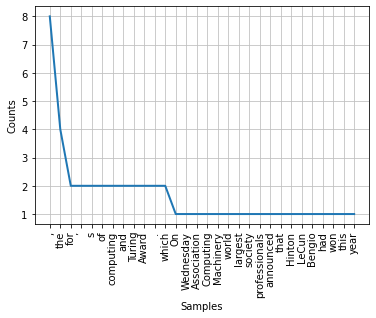

In [ ]:
import matplotlib.pyplot as plt
fd.plot(30, cumulative=False)
plt.show()

<FreqDist with 41 samples and 387 outcomes>


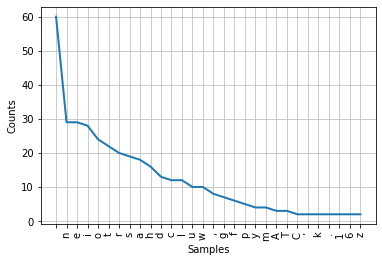

In [ ]:
fd_alpha = FreqDist(text)
print(fd_alpha)
fd_alpha.plot(30, cumulative=False)
plt.show()

# Collaborative Analytics with Plotly

## Introduction to Plotly

#### Create Statistical Charts

In [2]:
! pip install Plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cufflinks

In [ ]:
!pip install chart_studio

In [5]:
import numpy as np
import pandas as pd

import cufflinks as cf

import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [6]:
import chart_studio
chart_studio.tools.set_credentials_file(username='Wennene', api_key='xAk345EDuhXAB4adBA5v')

In [7]:
from  plotly.offline import iplot, init_notebook_mode, plot

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)

Output hidden; open in https://colab.research.google.com to view.

## Line Charts in Plotly

In [11]:
a = np.linspace(start=0, stop=36, num=36)
np.random.seed(25)

b = np.random.uniform(low=0.0, high=1.0, size=36)

trace = go.Scatter(x=a,y=b)
data = [trace]

iplot(data, show_link=False)

In [ ]:
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

configure_plotly_browser_state()

init_notebook_mode(connected=False)

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

Output hidden; open in https://colab.research.google.com to view.